In [1]:
import matplotlib.pyplot as plt

## Inference time for ExpansionNet vs ClipClap


In [10]:
ExpansionNetInference=1.01877
ClipClapInference = 0.366+0.415+0.209+0.503+0.317+0.206

In [11]:
ClipClapInference/ExpansionNetInference - 1

0.9788568567979035

Text(0.5, 1.0, 'Inference time - ExpansionNetV2 vs ClipClap\n Around 97.8% faster')

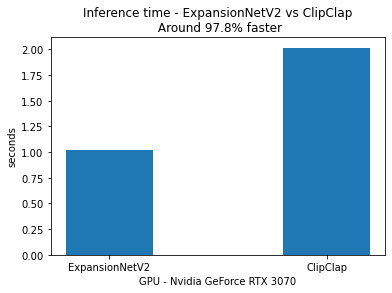

In [14]:
bar_data={"ExpansionNetV2":ExpansionNetInference,"ClipClap":ClipClapInference}
plt.bar(bar_data.keys(),bar_data.values(),width=0.4)
plt.ylabel("seconds")
plt.xlabel("GPU - Nvidia GeForce RTX 3070")
plt.title("Inference time - ExpansionNetV2 vs ClipClap\n Around 97.8% faster")

In [14]:
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu

In [7]:
ACTUALS=["two elephants walking in a grassy flat area",
            "a tennis player getting ready to hit a ball",
            "a group of large boats is parts at a city marina",
            "a man standing next to a man in a bathroom",
            "a herd of cattle are standing and grazing in a field",
            "men standing in a street next to a car and a large bus",
            "a train moves past a cement station platform",
            "a long railroad train carrying several cars behind it",
            "a man on a motor bike on a street",
            "a jumbo jet airplane coming in for a landing on a runway"]

PRED_CLIPCLAP=["elephants in the wild ",
                "tennis player in action during his first round match against tennis player",
                "aerial view of the port",
                "person, left, and person look at each other in the locker room",
                "cattle graze in a pasture",
                "passengers boarding a bus at a bus station",
                "a train on the line",
                "a train passes through australian local government area",
                "a police officer on a scooter",
                "aircraft model on the runway"]

PRED_EXPANSIONNET=["Two elephants walking in the grass in a field",
                    "A man holding a tennis racket on a tennis court",
                    "A group of boats are parked in the water at a beach",
                    "Two men in ties standing in front of a bathroom mirror",
                    "A herd of cows grazing in a field",
                    "A group of people standing on top of a car with a bus",
                    "A train is on the tracks at a train station",
                    "A train is on the tracks in a field",
                    "A police officer riding a motorcycle on a city street",
                    "A large airplane taking off from an airport runway"]

In [29]:
ACTUALS=["two elephants walking in a grassy flat area",
            "a tennis player getting ready to hit a ball",
            "a group of large boats is parts at a city marina",
            "a man standing next to a man in a bathroom",
            "a herd of cattle are standing and grazing in a field",
            "men standing in a street next to a car and a large bus",
            "a train moves past a cement station platform",
            "a long railroad train carrying several cars behind it",
            "a man on a motor bike on a street",
            "a jumbo jet airplane coming in for a landing on a runway"]

PRED_CLIPCLAP=["elephants in the wild ",
                "tennis player in action during his first round match against tennis player",
                "aerial view of the port",
                "person, left, and person look at each other in the locker room",
                "cattle graze in a pasture",
                "passengers boarding a bus at a bus station",
                "a train on the line",
                "a train passes through australian local government area",
                "a police officer on a scooter",
                "aircraft model on the runway"]

PRED_EXPANSIONNET=["Two elephants walking in the grass in a field",
                    "A man holding a tennis racket on a tennis court",
                    "A group of boats are parked in the water at a beach",
                    "Two men in ties standing in front of a bathroom mirror",
                    "A herd of cows grazing in a field",
                    "A group of people standing on top of a car with a bus",
                    "A train is on the tracks at a train station",
                    "A train is on the tracks in a field",
                    "A police officer riding a motorcycle on a city street",
                    "A large airplane taking off from an airport runway"]

In [35]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
AVG_ROUGE_1_precision=0
AVG_ROUGE_1_recall=0
AVG_ROUGE_L_precision=0
AVG_ROUGE_L_recall=0

for i  in range(10):
    scores=scorer.score(ACTUALS[i], PRED_CLIPCLAP[i])
    AVG_ROUGE_1_precision+=scores['rouge1'].precision
    AVG_ROUGE_L_precision+=scores['rougeL'].precision

    AVG_ROUGE_1_recall+=scores['rouge1'].recall
    AVG_ROUGE_L_recall+=scores['rougeL'].recall
print(AVG_ROUGE_1_precision)
print(AVG_ROUGE_L_precision)
print(AVG_ROUGE_1_recall)
print(AVG_ROUGE_L_recall)


3.675
3.675
2.2297591297591297
2.2297591297591297


In [36]:
from rouge_score import rouge_scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
AVG_ROUGE_1_precision=0
AVG_ROUGE_1_recall=0
AVG_ROUGE_L_precision=0
AVG_ROUGE_L_recall=0

for i  in range(10):
    scores=scorer.score(ACTUALS[i], PRED_EXPANSIONNET[i])
    AVG_ROUGE_1_precision+=scores['rouge1'].precision
    AVG_ROUGE_L_precision+=scores['rougeL'].precision

    AVG_ROUGE_1_recall+=scores['rouge1'].recall
    AVG_ROUGE_L_recall+=scores['rougeL'].recall
print(AVG_ROUGE_1_precision)
print(AVG_ROUGE_L_precision)
print(AVG_ROUGE_1_recall)
print(AVG_ROUGE_L_recall)


4.511285936285936
4.434362859362859
4.529467754467754
4.452544677544678


Text(0.5, 1.0, 'ROUGE 1 PRECISION - ExpansionNetV2 vs ClipClap')

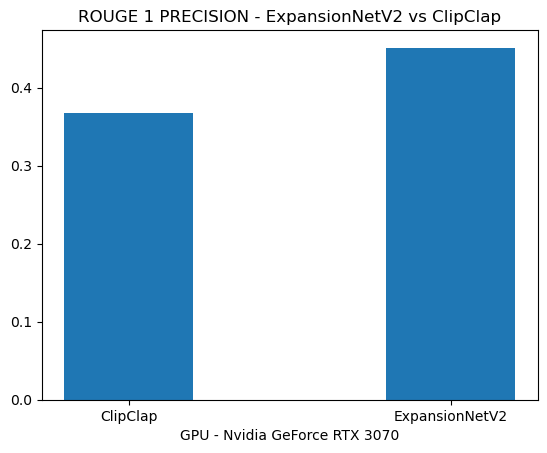

In [2]:
bar_data={"ClipClap":3.675/10,"ExpansionNetV2":4.511285936285936/10}
plt.bar(bar_data.keys(),bar_data.values(),width=0.4)
plt.xlabel("GPU - Nvidia GeForce RTX 3070")
plt.title("ROUGE 1 PRECISION - ExpansionNetV2 vs ClipClap")    

Text(0.5, 1.0, 'ROUGE 1 RECALL- ExpansionNetV2 vs ClipClap')

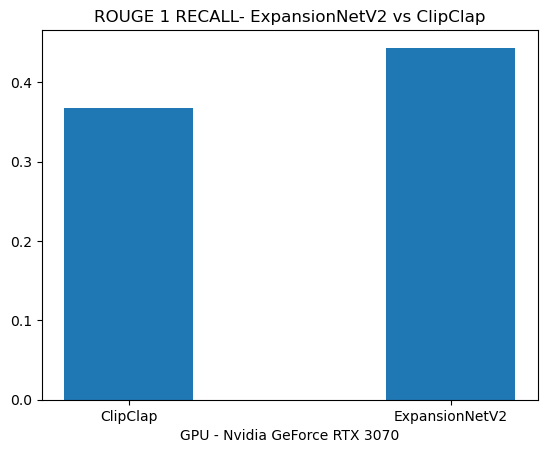

In [3]:
bar_data={"ClipClap":3.675/10,"ExpansionNetV2":4.434362859362859/10}
plt.bar(bar_data.keys(),bar_data.values(),width=0.4)
plt.xlabel("GPU - Nvidia GeForce RTX 3070")
plt.title("ROUGE 1 RECALL- ExpansionNetV2 vs ClipClap")    

Text(0.5, 1.0, 'ROUGE L PRECISION - ExpansionNetV2 vs ClipClap')

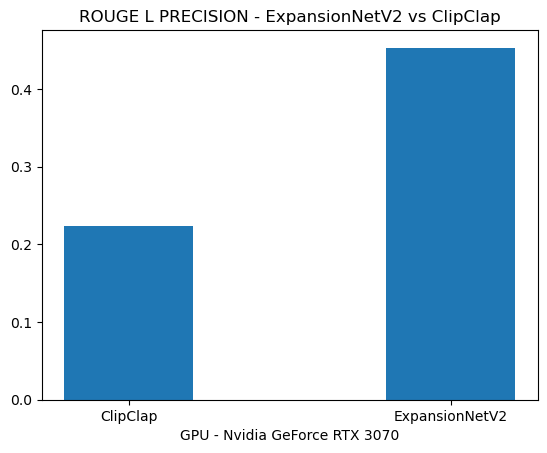

In [5]:
bar_data={"ClipClap":2.2297591297591297/10,"ExpansionNetV2":4.529467754467754/10}
plt.bar(bar_data.keys(),bar_data.values(),width=0.4)
plt.xlabel("GPU - Nvidia GeForce RTX 3070")
plt.title("ROUGE L PRECISION - ExpansionNetV2 vs ClipClap")    

Text(0.5, 1.0, 'ROUGE L RECALL - ExpansionNetV2 vs ClipClap')

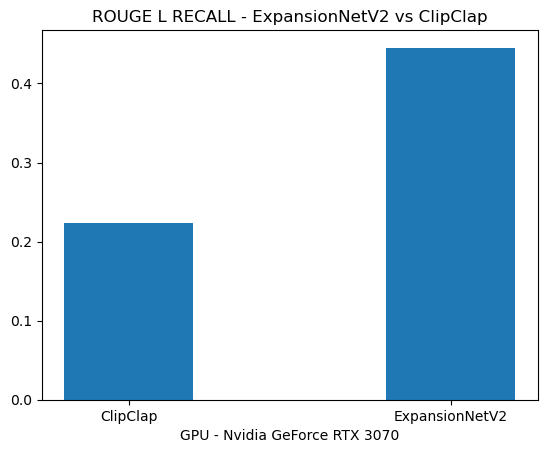

In [8]:
bar_data={"ClipClap":2.2297591297591297/10,"ExpansionNetV2":4.452544677544678/10}
plt.bar(bar_data.keys(),bar_data.values(),width=0.4)
plt.xlabel("GPU - Nvidia GeForce RTX 3070")
plt.title("ROUGE L RECALL - ExpansionNetV2 vs ClipClap")    

## BleU score

In [9]:
references=[
    ["two adult and one baby elephants in the bush.",
"three elephants, one being much smaller, are in the wild.",
"a group of elephants standing in a field.",
"three elephants standing outside in tall green and white grass",
"three male elephants standing by the edge of the forest"],
    [
        "two men taking care of an elephant near stairs.",
        "a person is getting ready to ride on top of an elephant.",
        "a person is standing on a stairway beside an elephant carrying a man.",
        "an elephant eating some leaves next to a flight of steps",
        "one man riding on top of an elephant"
    ],
    [
        "an elephant digging in dirt playfully on a dirty lot.",
"baby elephant digging a hole in the dirt",
"an elephant rubbing its head in the mud.",
"a baby elephant playing in the mud with it's face in the dirt.",
"an elephant is digging in the soft soil."
    ],
    [
        "a couple of people riding on the back of an elephant.",
        "a couple of people riding an elephant on a bench.",
        "two people riding an elephant on a path with many trees near by",
        "two people on an elephant in the jungle.",
        "two people riding on top of an elephant in the jungle"
    ],
    [
        "there are numerous elephants playing in the mud",
"a number of elephants near one another in a field",
"several elephants walk along a river while a baby elephant nurses on its mom.",
"a group of elephants near a river and grass",
"baby elephants are standing near their mothers on dirt"
    ],
    [
        "there is an elephant standing near the water.",
"an elephant drinks from a nearby river, while birds stand around.",
"a fully grown elephant drinking water out of a lake.",
"an elephant walking in the grass near water.",
"an elephants in a field near a body of water"
    ],
    [
       ' three elephants in a zoo two are facing away.'
"two elephants in a pen with their backs turned.",
"two elephants standing next to a wooden gate",
"two baby elephants are standing near a gate.",
"two elephants standing next to each other at a zoo."
    ],
    [
         "a number of elephants near one another in a small body of water",
"a bunch of elephants swimming in a river with a lot of rocks in it",
"a bunch of elephants are in the water",
"a large group of elephants who are in the water.",
"a herd of elephants are wading in the water."
    ],
    [
        "two men getting hold of an elephant in some body of water.",
"two men are with an elephant laying in the water.",
"an elephant laying on its side in a body of water",
"two people giving a elephant a bath in the river.",
"an elephant laying on it's side in a lake."
    ],
    [
        "an elephant sprays water from its trunk onto it's back in treed area.",
"an elephant under the trees spraying water with its trunk.",
"an elephant sloshes water on itself with it's trunk",
"a black elephant with tusks spraying water over his head.",
"an elephant is spraying water up and over itself"
    ]
]

In [10]:
EXPANSTIONNET=['A group of elephants standing in the grass.', 'A man riding on the back of an elephant.', 'A baby elephant laying in the dirt.', 'Two people riding on the back of an elephant.', 'A herd of elephants standing next to the water.', 'An elephant standing next to a body of water.', 'Two elephants standing next to each other in a zoo.', 'A herd of elephants are in a river.', 'Two men standing next to an elephant in a river.', 'An elephant with its trunk in the water.']

In [11]:
CLICLAP=['elephants in the wild - photo #.', 'elephants in the jungle - photo #.', 'elephant playing in the mud.', 'tourist attraction with an elephant.', 'elephants drinking at a waterhole.', 'elephants in the wild - photo #.', 'elephants in the zoo - photo #.', 'elephants bathing in the river.', 'elephants bathing in the river.', 'elephants in the wild - photo #.']

In [15]:
AVG_BLEU_EXP=0
for i in range(10):
    bleu=sentence_bleu([x.split() for x in references[i]], EXPANSTIONNET[i].split())
    AVG_BLEU_EXP+=bleu
AVG_BLEU_EXP/=10
print(AVG_BLEU_EXP)

0.2629922683568632


c:\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [16]:
AVG_BLEU_CLIPCLAP=0
for i in range(10):
    bleu=sentence_bleu([x.split() for x in references[i]], CLICLAP[i].split())
    AVG_BLEU_CLIPCLAP+=bleu
AVG_BLEU_CLIPCLAP/=10
print(AVG_BLEU_CLIPCLAP)

0.04614937374409929


c:\anaconda3\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


Text(0.5, 1.0, 'BLEU Score - ExpansionNetV2 vs ClipClap')

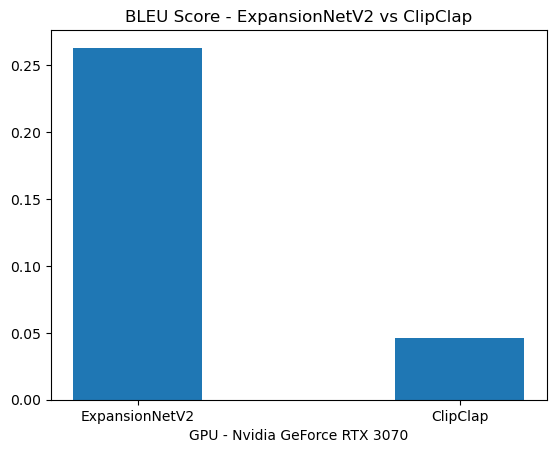

In [17]:
bar_data={"ExpansionNetV2":0.2629922683568632,"ClipClap":0.04614937374409929}
plt.bar(bar_data.keys(),bar_data.values(),width=0.4)
plt.xlabel("GPU - Nvidia GeForce RTX 3070")
plt.title("BLEU Score - ExpansionNetV2 vs ClipClap")

## Search Engine recall score

In [18]:
originals=["The Elephant Whisperers",'CUte Elephant - Funny Elephants Trolling Human Compilation',"Baby elephant causes havoc at home","Angry Elephant Charges Safari Guide | Big 5 | African Wild Elephants","Baby Elephant's Adorable First Bath | BBC Earth","The Never Give Up Elephant Named Mae Sri - ElephantNews","Elephants Ran To Reunion With The Favorite People Who Away For 14 Months - ElephantNews","Baby Elephant's Adorable First Bath | BBC Earth","Baby Elephant And Parents Make A Happy Noise While In The River - ElephantNews"]

In [19]:
my_keys=[       ['person', 'wearing', 'yellow', 'shirt', 'talking', 'cell', 'phone', '.', 'old', 'woman', 'wearing', 'red', 'shirt', '.', 'trunk', 'metal', 'object', 'room', '.', 'picture', 'cat', 'laying', 'table', '.', 'view', 'city', 'trees', 'hill', '.', 'young', 'animal', 'walking', 'grass', '.', 'elephant', 'standing', 'top', 'field', '.', 'man', 'walking', 'front', 'elephant', '.', 'man', 'walking', 'dirt', 'road', 'elephant', '.', 'person', 'walking', 'field', 'elephant', '.'],
                ['woman', 'standing', 'next', 'group', 'elephants', '.', 'Two', 'men', 'walking', 'street', 'elephant', '.', 'woman', 'feeding', 'elephant', 'fence', '.', 'man', 'standing', 'next', 'elephant', 'street', '.', 'woman', 'standing', 'next', 'elephant', '.', 'person', 'standing', 'back', 'elephant', '.', 'man', 'walking', 'elephant', 'street', '.', 'man', 'standing', 'next', 'elephant', 'street', '.', 'man', 'standing', 'next', 'elephant', 'street', '.', 'woman', 'standing', 'next', 'group', 'elephants', '.'],
                ['man', 'standing', 'next', 'elephant', 'field', '.', 'sign', 'red', 'lights', '.', 'small', 'elephant', 'standing', 'sidewalk', 'next', 'field', '.', 'cloudy', 'sky', 'trees', 'cloudy', 'sky', '.', 'man', 'standing', 'next', 'elephant', '.', 'red', 'sign', 'red', 'lights', '.', 'elephant', 'walking', 'field', 'grass', '.', 'house', 'trees', 'front', '.', 'red', 'sign', 'candles', '.', 'man', 'standing', 'next', 'small', 'elephant', '.'],
                ['person', 'looking', 'truck', 'dirt', 'road', '.', 'young', 'boy', 'taking', 'picture', 'elephant', 'dirt', 'road', '.', 'young', 'boy', 'talking', 'cell', 'phone', 'dirt', 'road', '.', 'young', 'boy', 'taking', 'picture', 'elephant', 'dirt', 'road', '.', 'man', 'vehicle', 'dirt', 'road', 'cell', 'phone', '.', 'man', 'taking', 'picture', 'elephant', 'dirt', 'road', '.'],
                ['baby', 'elephant', 'standing', 'next', 'adult', 'elephant', '.', 'man', 'looking', 'group', 'elephants', '.', 'elephant', 'standing', 'next', 'water', '.', 'group', 'elephants', 'standing', 'next', '.', 'Two', 'elephants', 'walking', 'water', 'field', '.', 'elephant', 'standing', 'next', 'baby', 'elephant', 'water', '.', 'view', 'back', 'elephant', '.', 'elephant', 'standing', 'next', 'table', '.', 'man', 'looking', 'camera', 'front', 'elephants', '.', 'baby', 'elephant', 'standing', 'next', 'adult', 'elephant', '.'],
                ['elephant', 'standing', 'next', 'group', 'people', '.', 'white', 'fence', 'wine', 'glass', '.', 'group', 'clouds', 'background', '.', 'view', 'mountains', 'background', 'mountains', 'background', '.', 'elephant', 'standing', 'dirt', '.', 'Two', 'people', 'standing', 'top', 'green', 'sign', '.', 'elephant', 'standing', 'next', 'fence', '.', 'mountain', 'trees', 'mountains', 'background', '.', 'Two', 'trucks', 'parked', 'side', 'road', '.', 'elephant', 'standing', 'next', 'green', 'white', 'fence', '.'],
                ['group', 'elephants', 'standing', 'water', '.', 'group', 'elephants', 'standing', 'water', '.', 'group', 'elephants', 'standing', 'water', '.', 'group', 'elephants', 'walking', 'water', '.', 'group', 'elephants', 'standing', 'water', '.', 'Three', 'elephants', 'standing', 'water', '.', 'group', 'elephants', 'standing', 'water', '.', 'group', 'elephants', 'standing', 'water', '.'],
                ['baby', 'elephant', 'standing', 'next', 'adult', 'elephant', '.', 'man', 'looking', 'group', 'elephants', '.', 'elephant', 'standing', 'next', 'water', '.', 'group', 'elephants', 'standing', 'next', '.', 'Two', 'elephants', 'walking', 'water', 'field', '.', 'elephant', 'standing', 'next', 'baby', 'elephant', 'water', '.', 'view', 'back', 'elephant', '.', 'elephant', 'standing', 'next', 'table', '.', 'man', 'looking', 'camera', 'front', 'elephants', '.', 'baby', 'elephant', 'standing', 'next', 'adult', 'elephant', '.'],
                ['Two', 'elephants', 'standing', 'water', '.', 'Two', 'elephants', 'standing', 'next', 'baby', 'elephant', 'water', '.', 'elephant', 'standing', 'water', '.', 'elephant', 'table', 'standing', 'next', '.', 'Two', 'elephants', 'standing', 'next', 'water', '.', 'elephant', 'trunk', 'side', '.', 'elephant', 'water', 'trunk', '.', 'group', 'elephants', 'standing', 'next', 'baby', 'elephant', '.', 'elephant', 'water', '.', 'Two', 'elephants', 'standing', 'next', 'water', '.'],
        ]

In [20]:
search_term="Elephants with people"
hits=0
for actual in originals:
    cap=actual.lower().split()

    if(("elephants" in cap or "elephant" in cap) and ("people" in cap or "person" in cap)):
        hits+=1
recall= hits/(7)
print(recall)


0.14285714285714285


In [21]:
vsearch_term="Elephants with people"
hits=0
for actual in my_keys:
    cap=actual

    if(("elephants" in cap or "elephant" in cap) and ("people" in cap or "person" in cap)):
        hits+=1
recall= hits/(7)
print(recall)


0.5714285714285714


Text(0.5, 1.0, 'Recall score')

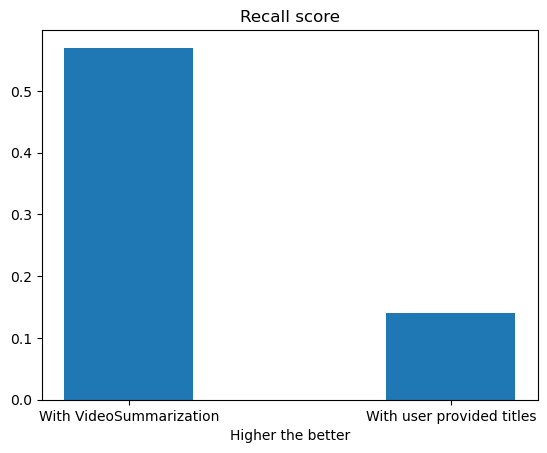

In [23]:
bar_data={"With VideoSummarization":0.57,"With user provided titles":0.14}
plt.bar(bar_data.keys(),bar_data.values(),width=0.4)
plt.xlabel("Higher the better")
plt.title("Recall score")

## Plotting for different classifiers

In [24]:
import pandas as pd

In [25]:
bilistm_summe=pd.read_csv("./logs/bilstm_summe.csv")
bilistm_tvsum=pd.read_csv("./logs/bilstm_tvsum.csv")
lstm_summe=pd.read_csv("./logs/lstmsumme.csv")
lstm_tvsum=pd.read_csv("./logs/lstm_tvsum.csv")


Text(0, 0.5, 'Cross Entropy Loss')

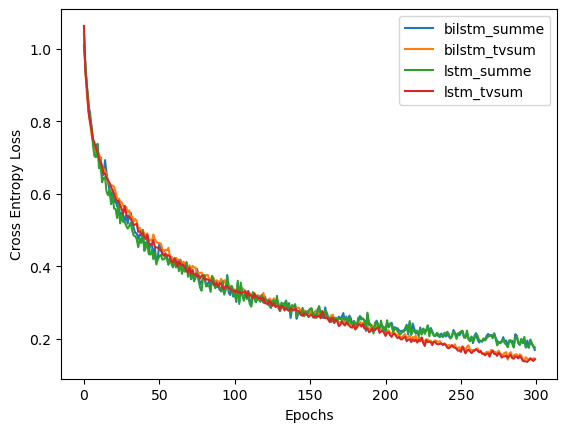

In [29]:
plt.plot(bilistm_summe["Loss1"][:300],label="bilstm_summe")
plt.plot(bilistm_tvsum["Loss1"][:300],label="bilstm_tvsum")
plt.plot(lstm_summe["Loss1"][:300],label="lstm_summe")
plt.plot(lstm_tvsum["Loss1"][:300],label="lstm_tvsum")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")

Text(0, 0.5, 'Location Regression Loss')

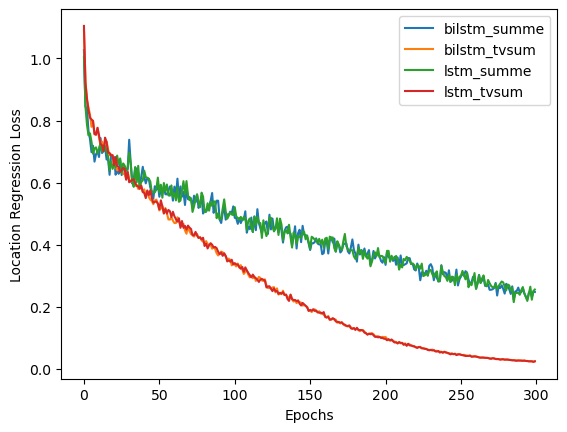

In [28]:
plt.plot(bilistm_summe["Loss2"][:300],label="bilstm_summe")
plt.plot(bilistm_tvsum["Loss2"][:300],label="bilstm_tvsum")
plt.plot(lstm_summe["Loss2"][:300],label="lstm_summe")
plt.plot(lstm_tvsum["Loss2"][:300],label="lstm_tvsum")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Location Regression Loss")